# understanding the problem statement
We need to make the ML model to pridict weither the person is eligible for the loan or not based on the information provided by the customer in the loan form

# importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df = pd.read_csv('loan_data.csv')

In [3]:
loan_df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
224,LP001750,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N


In [4]:
loan_df.shape

(614, 13)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# statistical measure
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# label encoding to convert categorical values with numbers
loan_df.replace({'Married':{'No': 0, 'Yes': 1}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'No':0 , 'Yes':1}, 'Loan_Status':{'Y':1 , 'N':0},
                'Property_Area': {'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Not Graduate':0, 'Graduate':1}}, inplace=True)

In [9]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [10]:
loan_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
# replacing 3+ with 4 to make it int and keep the value grater than 3
loan_df.replace({'Dependents':{'3+': 4}}, inplace = True)

In [12]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [13]:
loan_df['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [14]:
loan_df['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

# Data visualization
To get the understanding about the data



<Axes: xlabel='Education', ylabel='count'>

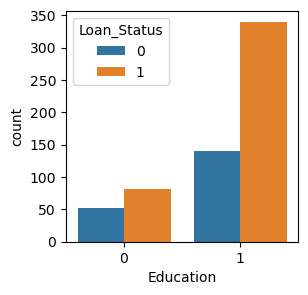

In [15]:
# plotting relation between education and loan status
plt.figure(figsize=(3,3))
sns.countplot(data=loan_df,
    x='Education',
    hue='Loan_Status',)
# so we can say that if a person is graduated he has the more chance to get loan approved

<Axes: xlabel='Property_Area', ylabel='count'>

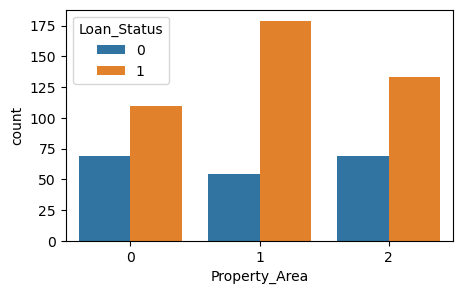

In [16]:
# plotting relation between Property_Area and loan status
plt.figure(figsize=(5,3))
sns.countplot(data=loan_df,
    x='Property_Area',
    hue='Loan_Status',)
# so we can say that if a person is graduated he has the more chance to get loan approved

<Axes: xlabel='Married', ylabel='count'>

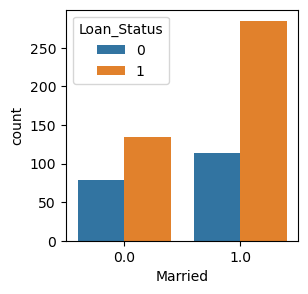

In [17]:
# plotting relation between marital status and loan status
plt.figure(figsize=(3,3))
sns.countplot(data=loan_df,
    x='Married',
    hue='Loan_Status',)
# so we can say that if a person is married he has the more chance to get loan approved

In [18]:
# to get the broad relation we can use correlation plot
correlation_matrix = loan_df.corr()

C:\Users\Inevitable\AppData\Local\Temp\ipykernel_8400\3580271979.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df.corr()


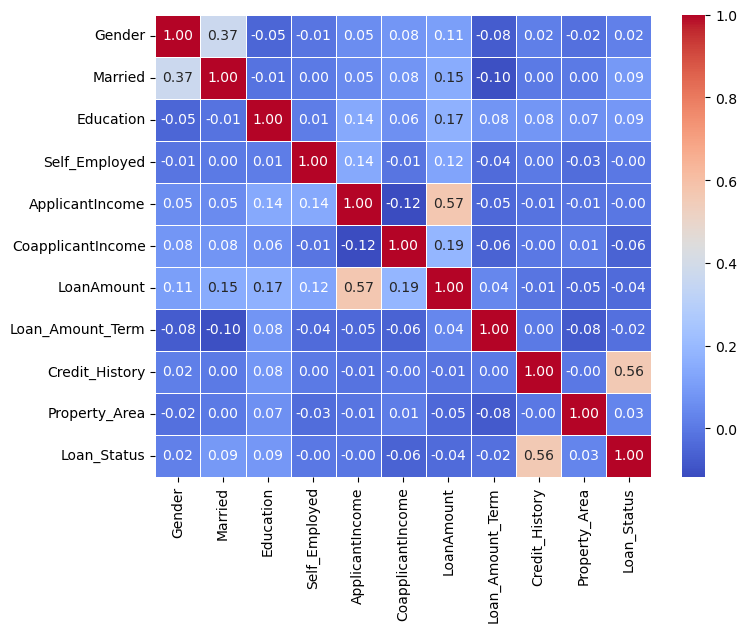

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',cmap='coolwarm', linewidths=.5)
plt.title = 'correlation_matrix'
plt.show()


In [20]:
df = loan_df.dropna()

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df.shape

(480, 13)

# Building the ML model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [24]:
# seperating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = df['Loan_Status']

In [25]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2


In [26]:
X.shape

(480, 11)

In [27]:
Y.head(2)

1    0
2    1
Name: Loan_Status, dtype: int64

In [28]:
Y.shape

(480,)

In [29]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=10)

In [30]:
print(X.shape,X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [31]:
print(Y.shape,Y_train.shape, Y_test.shape)

(480,) (384,) (96,)


# Training the Model with Support vector machine model


In [32]:
classifier = svm.SVC(kernel='linear')

In [33]:
# training the model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [34]:
# pridiction from trained model
X_train_pridiction = classifier.predict(X_train)
# calculating the accuracy score
training_data_accuracy = accuracy_score(X_train_pridiction,Y_train)
print('Accuracy score for training data: ',training_data_accuracy)

Accuracy score for training data:  0.7942708333333334


In [35]:
# Accuracy score of testing data
X_test_pridiction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_pridiction,Y_test)
print('Accuracy score for testing data: ',testing_data_accuracy)

Accuracy score for testing data:  0.7708333333333334


# Making a predictive system

In [37]:
input_data=(1,1,1,1,0,4583,1508,128,360,1,0)

# chaging the data type in numpy array
input_data_asarray = np.asarray(input_data)

# reshaping the input data 
input_data_reshaped = input_data_asarray.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0]==1:
    print('Customer is eligible for loan')
else:
    print(' Customer is not eligible for loan')

[1]
Customer is eligible for loan


C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [39]:
input_data = (1,1,4,1,0,3036,2504,158,360,0,1)
input_data_asarray = np.asarray(input_data)
input_data_reshaped = input_data_asarray.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if prediction[0]==1:
    print('Customer is eligible for loan')
else:
    print(' Customer is not eligible for loan')

[0]
 Customer is not eligible for loan


C:\Users\Inevitable\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
